In [1]:
!pip install keras-tuner --upgrade


Defaulting to user installation because normal site-packages is not writeable


In [4]:
import glob
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix,f1_score
from tensorflow import keras
import cv2
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import VGG16
#import keras_tuner as kt
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
import os, shutil
import pandas as pd

Folders found in dataset:
DevanagariHandwrittenCharacterDataset


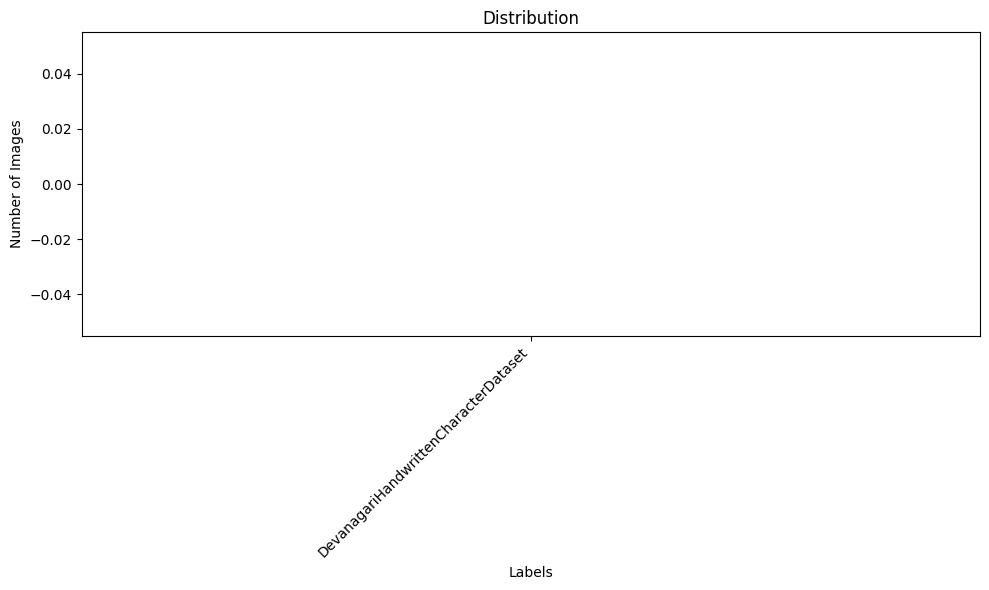

In [12]:
import os

base_dir = os.path.join(os.getcwd(), 'dataset')
print("Folders found in dataset:")
for label_name in os.listdir(base_dir):
    print(label_name)

label_counts = {}

for label_name in os.listdir(base_dir):
    label_path = os.path.join(base_dir, label_name)

    if os.path.isdir(label_path):
        num_images = len([f for f in os.listdir(label_path) if os.path.isfile(os.path.join(label_path, f))])
        label_counts[label_name] = num_images

df = pd.DataFrame(list(label_counts.items()), columns=['Label', 'Count'])

labels = df['Label'].tolist()
counts = df['Count'].tolist()

colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=colors)

plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.title('Distribution')
plt.xticks(rotation=45, ha='right')

'''for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')'''

plt.tight_layout()
plt.show()

In [ ]:
'''breast_img = glob.glob("C:\\Users\\RIYA\\Downloads\\breastcancer\\IDC_regular_ps50_idx5\\**\\*.png", recursive = True)'''


In [ ]:
#len(breast_img)

277524

In [ ]:
#breast_img[5:10]

['C:\\Users\\RIYA\\Downloads\\breastcancer\\IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1251_class0.png',
 'C:\\Users\\RIYA\\Downloads\\breastcancer\\IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1301_class0.png',
 'C:\\Users\\RIYA\\Downloads\\breastcancer\\IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1351_class0.png',
 'C:\\Users\\RIYA\\Downloads\\breastcancer\\IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1501_class0.png',
 'C:\\Users\\RIYA\\Downloads\\breastcancer\\IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1551_class0.png']

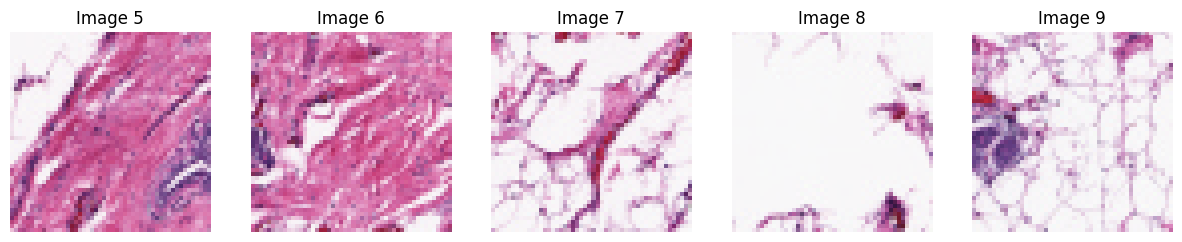

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming breast_img contains file paths to images
selected_images = breast_img[5:10]  # Select images from index 5 to 9

# Display the images in a row
plt.figure(figsize=(15,5))  # Adjust figure size

for i, img_path in enumerate(selected_images):
    img = Image.open(img_path)  # Open image
    
    plt.subplot(1, len(selected_images), i+1)  # Create subplot
    plt.imshow(img)  # Show image
    plt.axis('off')  # Hide axes
    plt.title(f"Image {i+5}")  # Title

plt.show()


In [9]:
data=[]
label=[]
c=0
b=0
for i in breast_img:
      a=cv2.imread(i,cv2.IMREAD_COLOR)
      a=cv2.resize(a, (224, 224), interpolation = cv2.INTER_LINEAR)
      if i[-5]=='0' and b<=5000:
        label.append(0)
        data.append(a)
        b+=1
      elif  i[-5]=='1' and c<=5000:
        label.append(1)
        data.append(a) 
        c+=1
     
      if b>=5000 and c>=5000:
        break

In [10]:
data=np.array(data)
label=np.array(label)

In [11]:
data.shape,label.shape

((10001, 224, 224, 3), (10001,))

In [12]:
data[0],label[0]

(array([[[206, 164, 226],
         [206, 164, 226],
         [205, 163, 226],
         ...,
         [234, 211, 242],
         [235, 213, 243],
         [235, 213, 243]],
 
        [[206, 164, 226],
         [206, 164, 226],
         [205, 163, 226],
         ...,
         [234, 211, 242],
         [235, 213, 243],
         [235, 213, 243]],
 
        [[205, 163, 225],
         [205, 163, 225],
         [204, 162, 225],
         ...,
         [233, 211, 242],
         [235, 213, 242],
         [235, 213, 242]],
 
        ...,
 
        [[181, 126, 212],
         [181, 126, 212],
         [181, 127, 212],
         ...,
         [208, 175, 213],
         [209, 176, 213],
         [209, 176, 213]],
 
        [[181, 125, 212],
         [181, 125, 212],
         [181, 125, 212],
         ...,
         [210, 179, 215],
         [211, 180, 215],
         [211, 180, 215]],
 
        [[181, 125, 212],
         [181, 125, 212],
         [181, 126, 212],
         ...,
         [210, 179, 215],
  

In [13]:
unique_values, counts = np.unique(label, return_counts=True)
for i in range(len(counts)):
  print(unique_values[i],counts[i])

0 5001
1 5000


In [14]:
unique_values=['Non IDC','IDC']

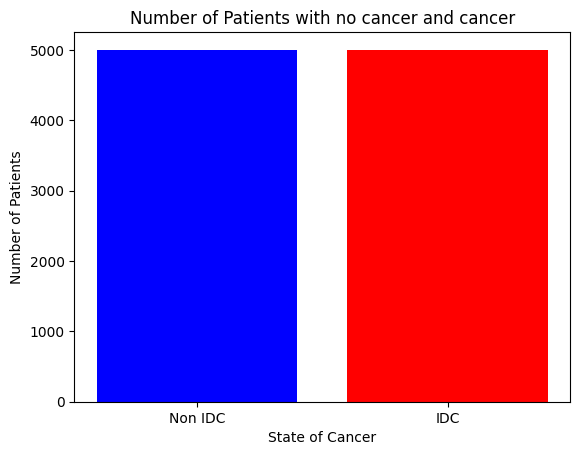

In [15]:
plt.bar(unique_values,counts,color=['Blue','red'])
# Adding labels and a title
plt.xlabel('State of Cancer')
plt.ylabel('Number of Patients')
plt.title('Number of Patients with no cancer and cancer')

# Display the bar chart
plt.show()

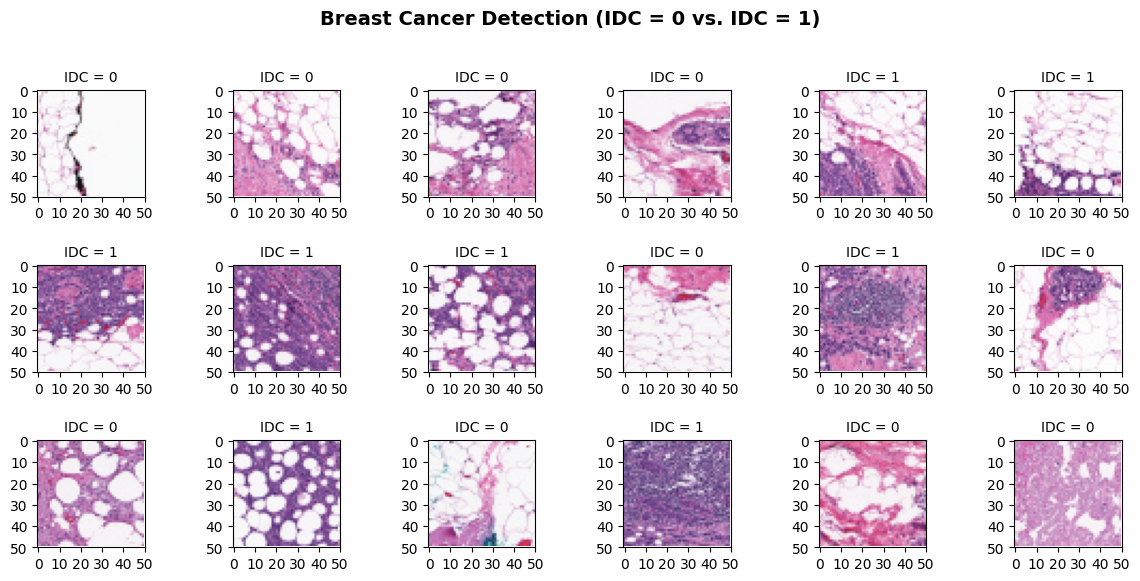

In [17]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to load and preprocess random images
def load_random_images(root_folder, class_label, limit=10):
    images = []
    labels = []
    
    for subdir, _, _ in os.walk(root_folder):
        class_folder = os.path.join(subdir, str(class_label))  # Look for '0' or '1' folders
        if os.path.exists(class_folder):
            img_files = os.listdir(class_folder)
            random.shuffle(img_files)  # Shuffle images

            for filename in img_files[:limit]:
                img_path = os.path.join(class_folder, filename)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                img = cv2.resize(img, (50, 50))  # Resize to 50x50 for consistency

                images.append(img)
                labels.append(f"IDC = {class_label}")  # Assign label
                
        if len(images) >= limit:
            break  # Stop after reaching limit
    
    return images, labels

# Dataset path
dataset_path = "C:\\Users\\RIYA\\Downloads\\breastcancer\\IDC_regular_ps50_idx5"

# Load images for IDC = 0 (Benign) and IDC = 1 (Malignant)
idc_0_images, idc_0_labels = load_random_images(dataset_path, class_label=0, limit=10)
idc_1_images, idc_1_labels = load_random_images(dataset_path, class_label=1, limit=10)

# Combine and shuffle images and labels together
all_images = idc_0_images + idc_1_images
all_labels = idc_0_labels + idc_1_labels
combined = list(zip(all_images, all_labels))
random.shuffle(combined)  # Shuffle images from both categories

# Unpack shuffled data
shuffled_images, shuffled_labels = zip(*combined)

# Grid layout settings
rows, cols = 3, 6  # Adjust grid size based on the number of images
fig, axes = plt.subplots(rows, cols, figsize=(12, 6), dpi=100)  # High-resolution

fig.suptitle("Breast Cancer Detection (IDC = 0 vs. IDC = 1)", fontsize=14, fontweight='bold')

# Plot each image in the grid
for i, ax in enumerate(axes.flat):
    if i < len(shuffled_images):  # Ensure not to exceed available images
        ax.imshow(shuffled_images[i])
        ax.set_title(shuffled_labels[i], fontsize=10, color='black')  # Label each image
        
        # Enable axes with even ticks
        ax.set_xticks(np.arange(0, 51, 10))  # X-axis ticks at intervals of 10
        ax.set_yticks(np.arange(0, 51, 10))  # Y-axis ticks at intervals of 10

    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout(pad=2)  # Adjust layout for better spacing
plt.show()


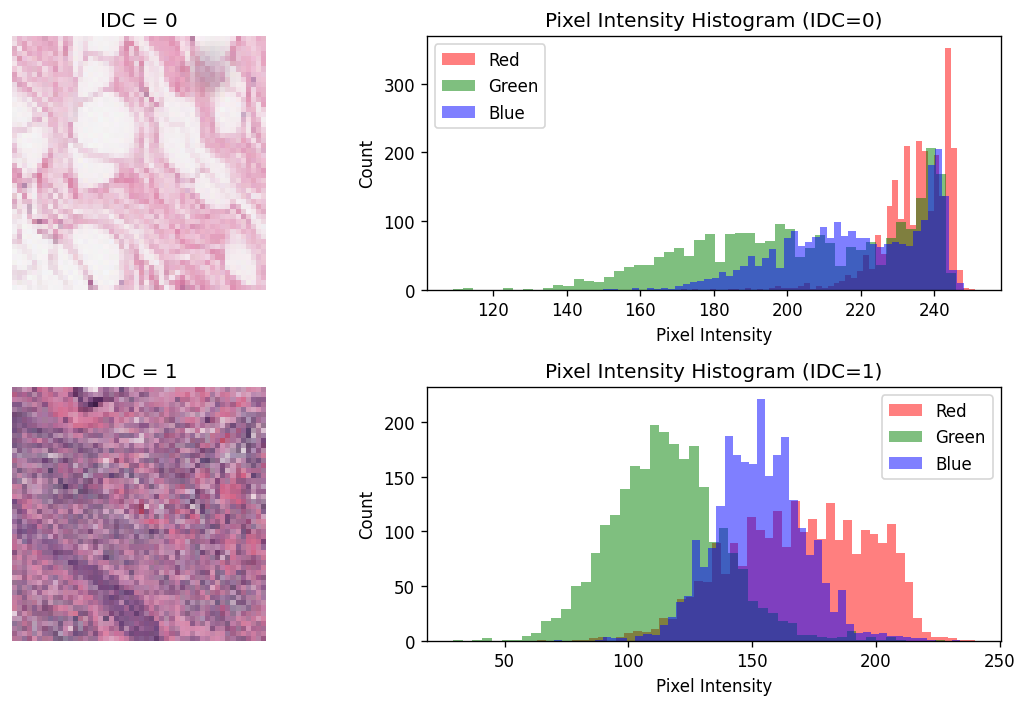

In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to get one random image from IDC=0 or IDC=1 (searching through subfolders)
def get_random_image(root_folder, class_label):
    img_paths = []

    # Search through all subfolders
    for subdir, _, files in os.walk(root_folder):
        if subdir.endswith(f"\\{class_label}"):  # Check if the folder name is "0" or "1"
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
                    img_paths.append(os.path.join(subdir, file))

    if not img_paths:
        raise FileNotFoundError(f"No images found for IDC={class_label} in any subfolder!")

    # Pick one random image
    img_path = random.choice(img_paths)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    return img, class_label

# Dataset path (update if needed)
dataset_path = "C:\\Users\\RIYA\\Downloads\\breastcancer\\IDC_regular_ps50_idx5"

# Load one random image from IDC = 0 and one from IDC = 1
img_0, label_0 = get_random_image(dataset_path, class_label=0)
img_1, label_1 = get_random_image(dataset_path, class_label=1)

# Function to plot image and histogram
def plot_image_and_histogram(img, label, ax_img, ax_hist):
    ax_img.imshow(img)
    ax_img.set_title(f"IDC = {label}", fontsize=12)
    ax_img.axis("off")

    # Split channels
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]

    # Plot histograms
    ax_hist.hist(r.ravel(), bins=50, color='red', alpha=0.5, label="Red")
    ax_hist.hist(g.ravel(), bins=50, color='green', alpha=0.5, label="Green")
    ax_hist.hist(b.ravel(), bins=50, color='blue', alpha=0.5, label="Blue")
    
    ax_hist.set_title(f"Pixel Intensity Histogram (IDC={label})", fontsize=12)
    ax_hist.set_xlabel("Pixel Intensity")
    ax_hist.set_ylabel("Count")
    ax_hist.legend()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6), dpi=120)

# Plot IDC = 0
plot_image_and_histogram(img_0, label_0, axes[0, 0], axes[0, 1])

# Plot IDC = 1
plot_image_and_histogram(img_1, label_1, axes[1, 0], axes[1, 1])

plt.tight_layout()
plt.show()


In [19]:
x_train,x_test,y_train,y_test=train_test_split(data,label,random_state=78,test_size=0.25)

In [20]:
unique_values, counts = np.unique(y_test, return_counts=True)
for i in range(len(counts)):
  print(unique_values[i],counts[i])

0 1237
1 1264


In [21]:
x_test.shape,y_train.shape

((2501, 224, 224, 3), (7500,))

In [22]:
y_train=tf.one_hot(y_train,2)
y_test=tf.one_hot(y_test,2)

In [23]:
y_train

<tf.Tensor: shape=(7500, 2), dtype=float32, numpy=
array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)>

In [24]:
def build_model(hp):
    model = keras.Sequential()
    c=0
    # Add convolutional layers
    for i in range(hp.Int('convolayer', 3, 8)):
        if c == 0:
            model.add(keras.layers.Conv2D(filters=hp.Int('Filter' + str(i), 32,128, step=32),
                                          kernel_size=3,
                                          padding='same',
                                          activation='relu',
                                          input_shape=(224, 224, 3)))
            model.add(keras.layers.MaxPooling2D((2, 2),padding="valid",strides =2))
        else:
            model.add(keras.layers.Conv2D(filters=hp.Int('Filter' + str(i), 32, 128, step=32),
                                          kernel_size=3,
                                          padding='same',
                                          activation='relu'))
            model.add(keras.layers.MaxPooling2D((2, 2),padding="valid",strides =2))

        c=c+1
    model.add(keras.layers.Flatten())
    # Add dense layers

    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(2, activation='softmax'))
    # Compile the model
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=5,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

c:\Users\RIYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
best_hyperparameter = tuner.get_best_hyperparameters()[0].values
best_hyperparameter

{'convolayer': 7,
 'Filter0': 64,
 'Filter1': 32,
 'Filter2': 128,
 'Filter3': 128,
 'Filter4': 64,
 'Filter5': 96,
 'Filter6': 32}

In [ ]:
best_model=tuner.get_best_models(num_models=1)[0]
best_model.summary()

c:\Users\RIYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 96)       │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 32)       │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 399,458 (1.52 MB)

 Trainable params: 399,458 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history1=best_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15, initial_epoch=3, batch_size = 75)

Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 453s 4s/step - accuracy: 0.8262 - loss: 0.4205 - val_accuracy: 0.8437 - val_loss: 0.3679
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 402s 4s/step - accuracy: 0.8497 - loss: 0.3625 - val_accuracy: 0.8401 - val_loss: 0.3693
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 424s 4s/step - accuracy: 0.8497 - loss: 0.3536 - val_accuracy: 0.8545 - val_loss: 0.3272
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 424s 4s/step - accuracy: 0.8600 - loss: 0.3207 - val_accuracy: 0.8521 - val_loss: 0.3261
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 389s 4s/step - accuracy: 0.8690 - loss: 0.2944 - val_accuracy: 0.8369 - val_loss: 0.3730
Epoch 9/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 358s 4s/step - accuracy: 0.8519 - loss: 0.3511 - val_accuracy: 0.8477 - val_loss: 0.3483
Epoch 10/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 449s 4s/step - accuracy: 0.8793 - loss: 0.2815 - val_accuracy: 0.8557 - val_loss: 0.3390
Epoch 11/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 377s 4s/step - accuracy: 0.8843 - loss: 0.2786 - val_ac

In [ ]:
y_pred=best_model.predict(x_test)
y_pred_max=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis = 1)

79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 368ms/step


In [ ]:
accuracy1=accuracy_score(y_true,y_pred_max)
precision1=precision_score(y_true,y_pred_max)
recall1=recall_score(y_true,y_pred_max)
f1score1=f1_score(y_true,y_pred_max)

In [ ]:
print("Precision of keras-tuner is:",precision1)
print("Accuracy of keras-tuner is:",accuracy1)
print("Recall of keras-tuner is:",recall1)
print("F1 Score of keras-tuner is:",f1score1)

Precision of keras-tuner is: 0.8067528735632183
Accuracy of keras-tuner is: 0.8360655737704918
Recall of keras-tuner is: 0.8884493670886076
F1 Score of keras-tuner is: 0.8456325301204819


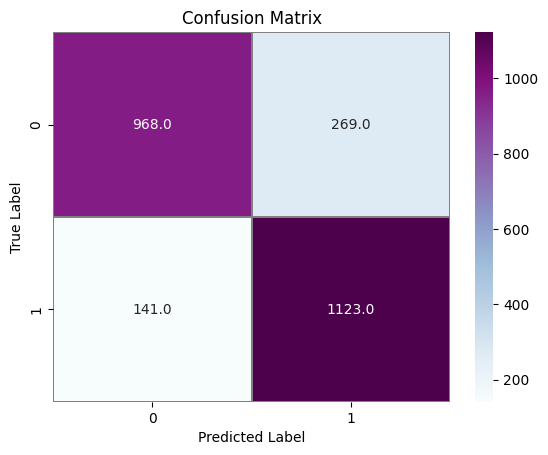

In [ ]:
confusion_mtx = confusion_matrix(y_true,y_pred_max)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

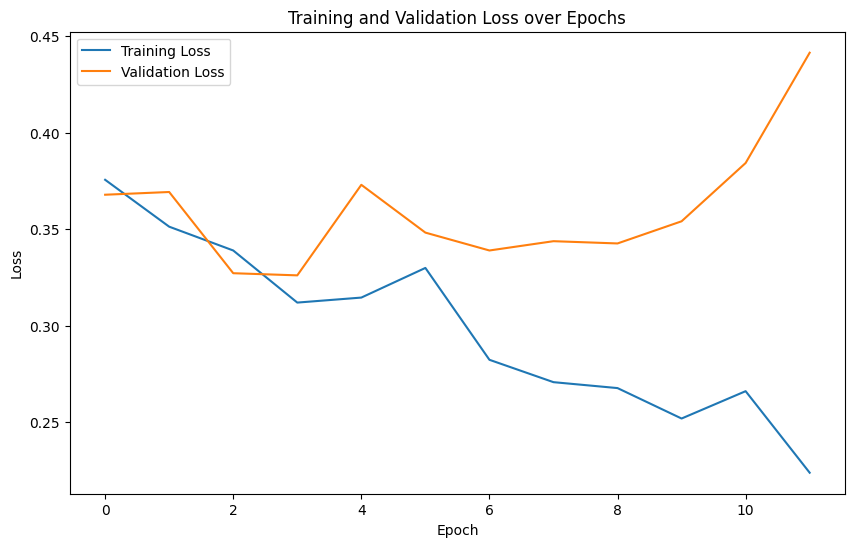

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

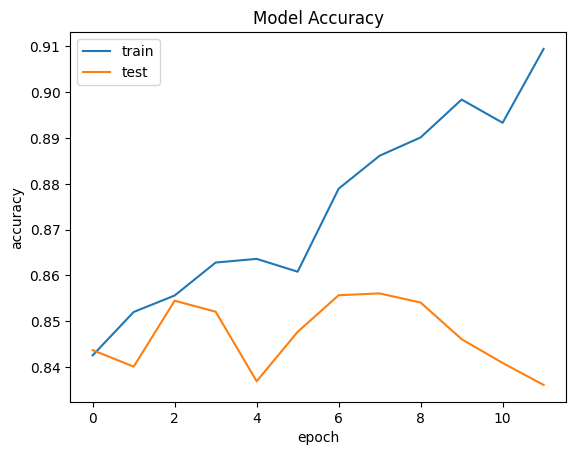

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

vgg

In [25]:
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))

In [26]:
# i.e. freeze all convolutional VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = keras.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history2=model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 75)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1911s 19s/step - accuracy: 0.7909 - loss: 1.4765 - val_accuracy: 0.8413 - val_loss: 0.3880
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1855s 19s/step - accuracy: 0.8699 - loss: 0.3105 - val_accuracy: 0.8273 - val_loss: 0.4108
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1869s 19s/step - accuracy: 0.8562 - loss: 0.3145 - val_accuracy: 0.8261 - val_loss: 0.4239
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3362s 34s/step - accuracy: 0.8907 - loss: 0.2386 - val_accuracy: 0.8249 - val_loss: 0.4470
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1855s 18s/step - accuracy: 0.8852 - loss: 0.2256 - val_accuracy: 0.8441 - val_loss: 0.4590
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1884s 19s/step - accuracy: 0.8956 - loss: 0.2029 - val_accuracy: 0.8337 - val_loss: 0.5203
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1875s 19s/step - accuracy: 0.8898 - loss: 0.1937 - val_accuracy: 0.8545 - val_loss: 0.6503
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1815s 18s/step - accuracy: 0.8983 - loss: 0

In [ ]:
y_pred=model.predict(x_test)
y_pred_max=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis = 1)

79/79 ━━━━━━━━━━━━━━━━━━━━ 481s 6s/step


In [ ]:
accuracy2=accuracy_score(y_true,y_pred_max)
precision2=precision_score(y_true,y_pred_max)
recall2=recall_score(y_true,y_pred_max)
f1score2=f1_score(y_true,y_pred_max)

In [ ]:
print("Precision of VGG16 model is:",precision2)
print("Accuracy  of VGG16 model is:",accuracy2)
print("Recall  of VGG16 model  is:",recall2)
print("F1 Score  of VGG16 model  is:",f1score2)

Precision of VGG16 model is: 0.8375286041189931
Accuracy  of VGG16 model is: 0.8484606157536985
Recall  of VGG16 model  is: 0.8686708860759493
F1 Score  of VGG16 model  is: 0.8528155339805825


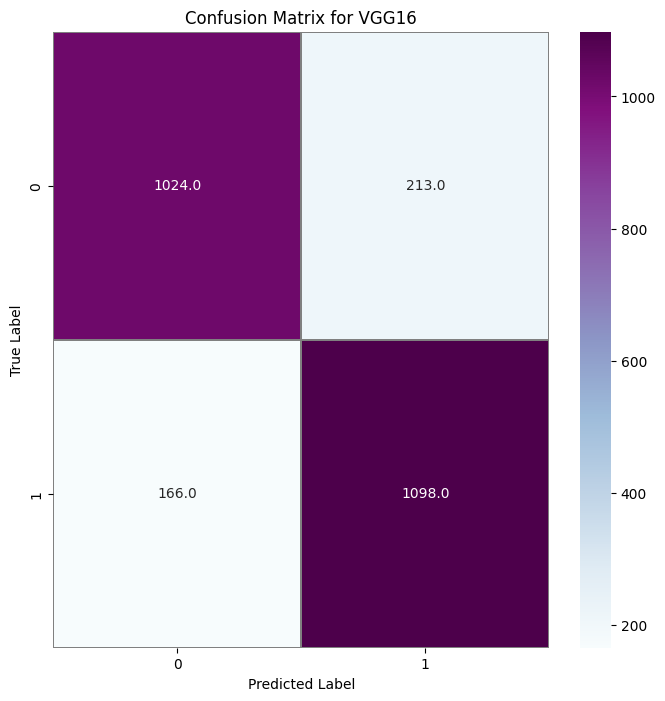

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_max) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for VGG16")
plt.show()

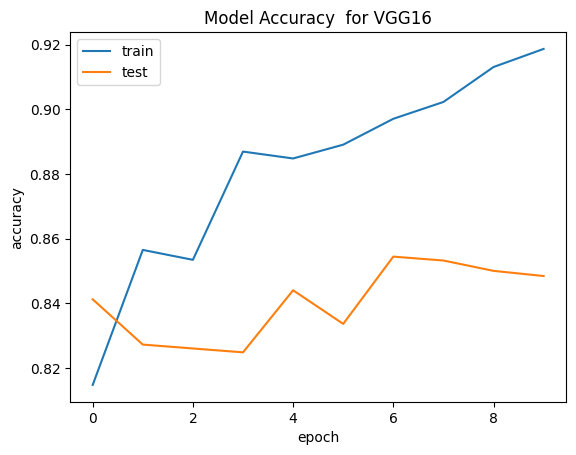

In [ ]:
#Plotting training and validation accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy  for VGG16')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

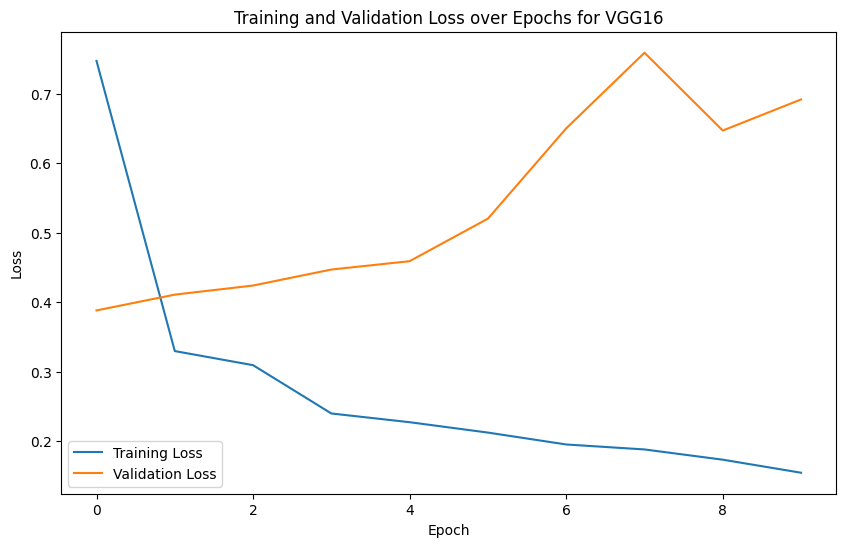

In [ ]:
# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs for VGG16')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1]:
!pip install lime shap tensorflow numpy matplotlib opencv-python



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.segmentation import mark_boundaries
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import lime
import lime.lime_image

# 🔹 Load Pretrained ResNet50 Model (Exclude Fully Connected Layers)
model = ResNet50(weights="imagenet", include_top=False)  # Exclude dense layers to reduce memory

# 🔹 Load and Preprocess Image (Resize for efficiency)
img_path = "C:\\Users\\RIYA\\Downloads\\breastcancer\\9383\\1\\9383_idx5_x1951_y651_class1.png"  # Replace with your image path
original_img = image.load_img(img_path, target_size=(224, 224))  # Resize to ResNet50 input size
img_array = image.img_to_array(original_img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dims to fit model input
img_array = preprocess_input(img_array)  # Apply ResNet50 preprocessing

# 🔹 LIME Explainer
explainer = lime.lime_image.LimeImageExplainer()

# 🔹 Prediction function for LIME
def predict_fn(images):
    images = np.array([preprocess_input(img) for img in images])
    preds = model.predict(images)
    return preds

# 🔹 Explain the image using LIME (Reduce num_samples to avoid OOM)
explanation = explainer.explain_instance(
    img_array[0], predict_fn, top_labels=1, hide_color=0, num_samples=200  # Lowered samples
)

# 🔹 Get LIME Explanation Mask
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False
)

# 🔹 Plot LIME Explanation with Legends
plt.figure(figsize=(6, 6))
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation for ResNet50")
plt.axis("off")
plt.colorbar()  # Adds a color legend
plt.show()


MemoryError: Unable to allocate 9.00 MiB for an array with shape (3, 3, 512, 512) and data type float32

  0%|          | 0/500 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-51.779..141.061].


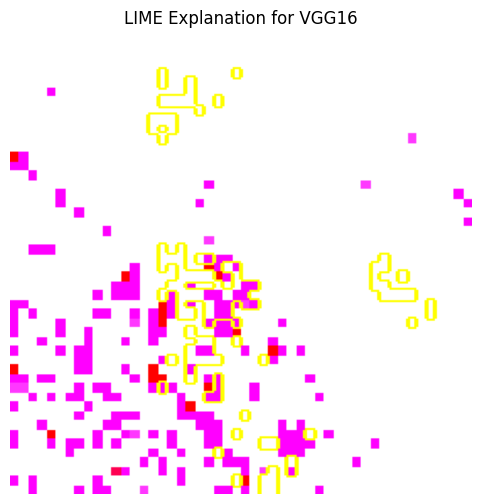

In [ ]:
# Implement LIME for Explainability
explainer = lime.lime_image.LimeImageExplainer()

# Prediction function for LIME
def predict_fn(images):
    images = np.array([preprocess_input(img) for img in images])
    return model.predict(images)

# Explain the image using LIME
explanation = explainer.explain_instance(
    img_array[0], predict_fn, top_labels=1, hide_color=0, num_samples=500
)

# Visualizing the Explanation
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False
)

plt.figure(figsize=(6, 6))  # Smaller figure size
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation for VGG16")
plt.axis("off")
plt.show()



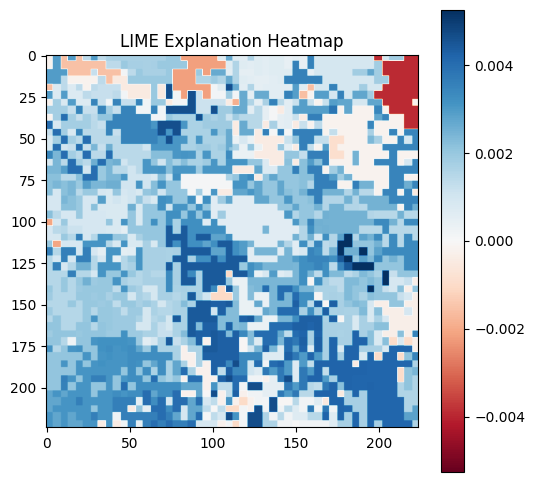

In [ ]:
# Extract LIME heatmap
ind = explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

# Display the heatmap
plt.figure(figsize=(6, 6))  # Smaller figure size
plt.imshow(heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
plt.colorbar()
plt.title("LIME Explanation Heatmap")
plt.show()




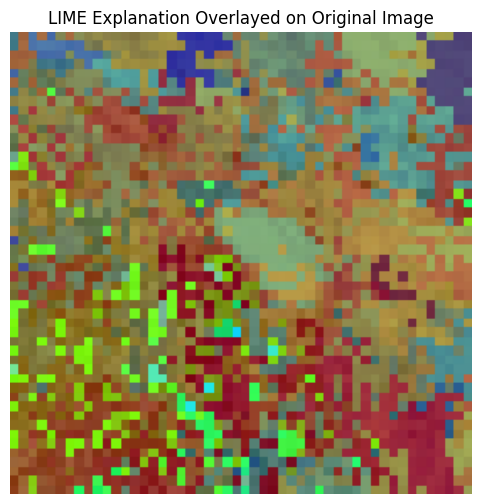

In [ ]:
# Overlay heatmap on the original image
original_image = img_array[0].astype('uint8')
heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))

# Normalize heatmap values
heatmap_norm = (heatmap_resized - np.min(heatmap_resized)) / (np.max(heatmap_resized) - np.min(heatmap_resized))
colormap = plt.get_cmap('jet')
heatmap_colored = colormap(heatmap_norm)
heatmap_colored = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)

# Overlay heatmap on the original image
overlayed_image = cv2.addWeighted(original_image, 0.6, heatmap_colored, 0.4, 0)

# Show overlayed image
plt.figure(figsize=(6, 6))  # Smaller figure size
plt.imshow(overlayed_image)
plt.axis("off")
plt.title("LIME Explanation Overlayed on Original Image")
plt.show()

In [22]:
!pip install tf-explain



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: velvet (15.89%)


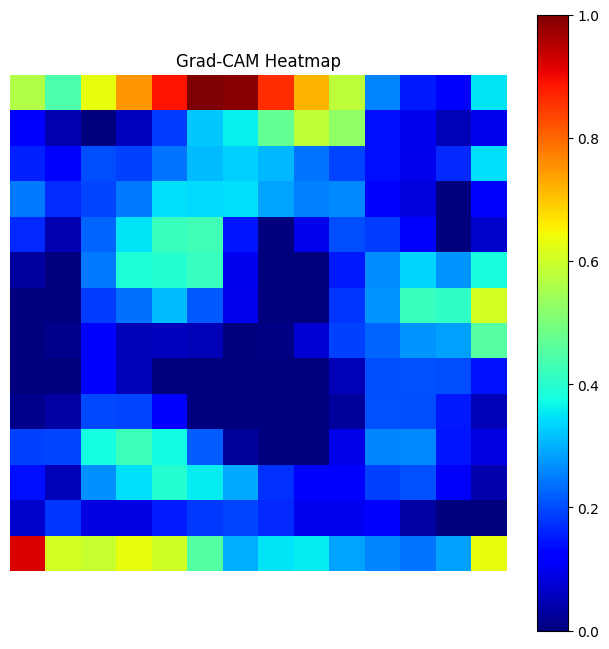

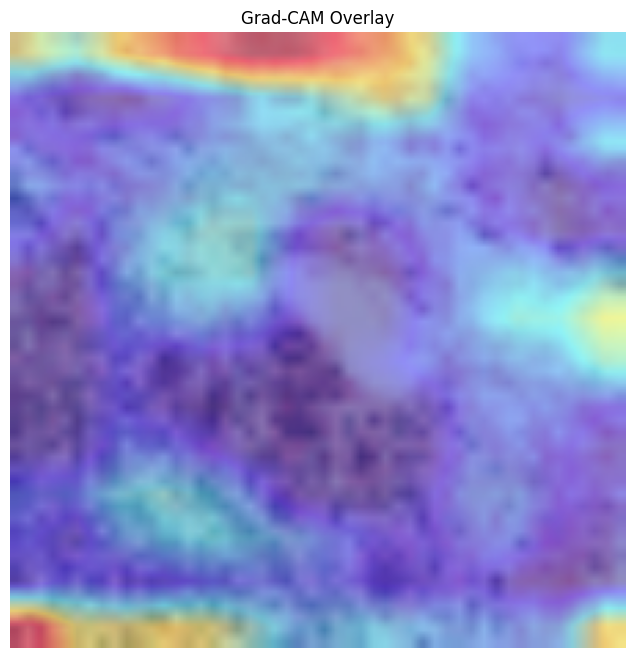

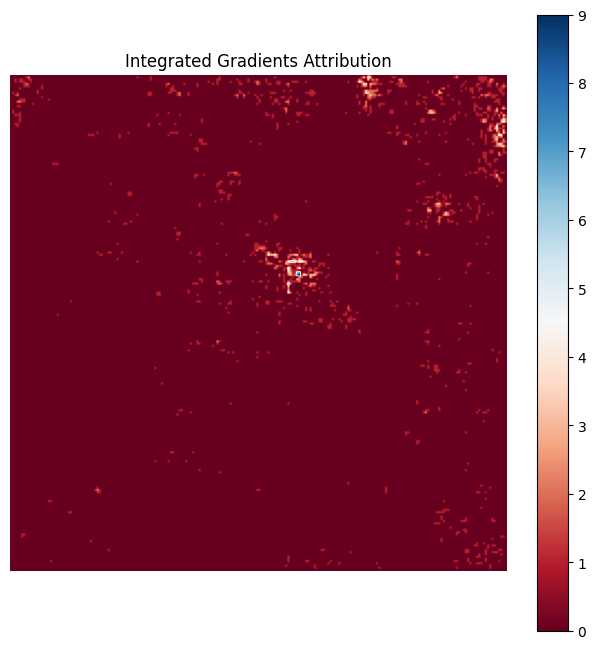

In [23]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tf_explain.core.integrated_gradients import IntegratedGradients

# Load the Pretrained VGG16 Model
model = VGG16(weights='imagenet')
last_conv_layer = model.get_layer("block5_conv3")  # Last convolutional layer

# Load and preprocess an image
img_path = "C:\\Users\\RIYA\\Downloads\\breastcancer\\9344\\1\\9344_idx5_x2451_y901_class1.png"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Get model predictions
preds = model.predict(img_array)
decoded_preds = decode_predictions(preds, top=1)[0]
pred_class = np.argmax(preds[0])  # Get top predicted class

print(f"Prediction: {decoded_preds[0][1]} ({decoded_preds[0][2]*100:.2f}%)")

# -----------------------------------------------------------------------------------
# Grad-CAM Implementation
# -----------------------------------------------------------------------------------
grad_model = Model(inputs=model.input, outputs=[last_conv_layer.output, model.output])

with tf.GradientTape() as tape:
    conv_output, predictions = grad_model(img_array)
    loss = predictions[:, pred_class]

grads = tape.gradient(loss, conv_output)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)[0].numpy()

# Normalize and visualize heatmap
heatmap = np.maximum(heatmap, 0)  # Remove negative values
heatmap /= np.max(heatmap)

plt.figure(figsize=(8, 8))
plt.imshow(heatmap, cmap='jet')
plt.colorbar()
plt.title("Grad-CAM Heatmap")
plt.axis("off")
plt.show()

# Overlay heatmap on original image
original = cv2.imread(img_path)
original = cv2.resize(original, (224, 224))

heatmap = cv2.resize(heatmap, (original.shape[1], original.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

overlayed = cv2.addWeighted(original, 0.6, heatmap, 0.4, 0)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(overlayed, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Grad-CAM Overlay")
plt.show()

# -----------------------------------------------------------------------------------
# Integrated Gradients Implementation
# -----------------------------------------------------------------------------------
explainer = IntegratedGradients()
explanation = explainer.explain((img_array, None), model, class_index=pred_class)

plt.figure(figsize=(8, 8))
plt.imshow(explanation, cmap='RdBu')
plt.colorbar()
plt.title("Integrated Gradients Attribution")
plt.axis("off")
plt.show()



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Decision Tree Accuracy: 88.74%


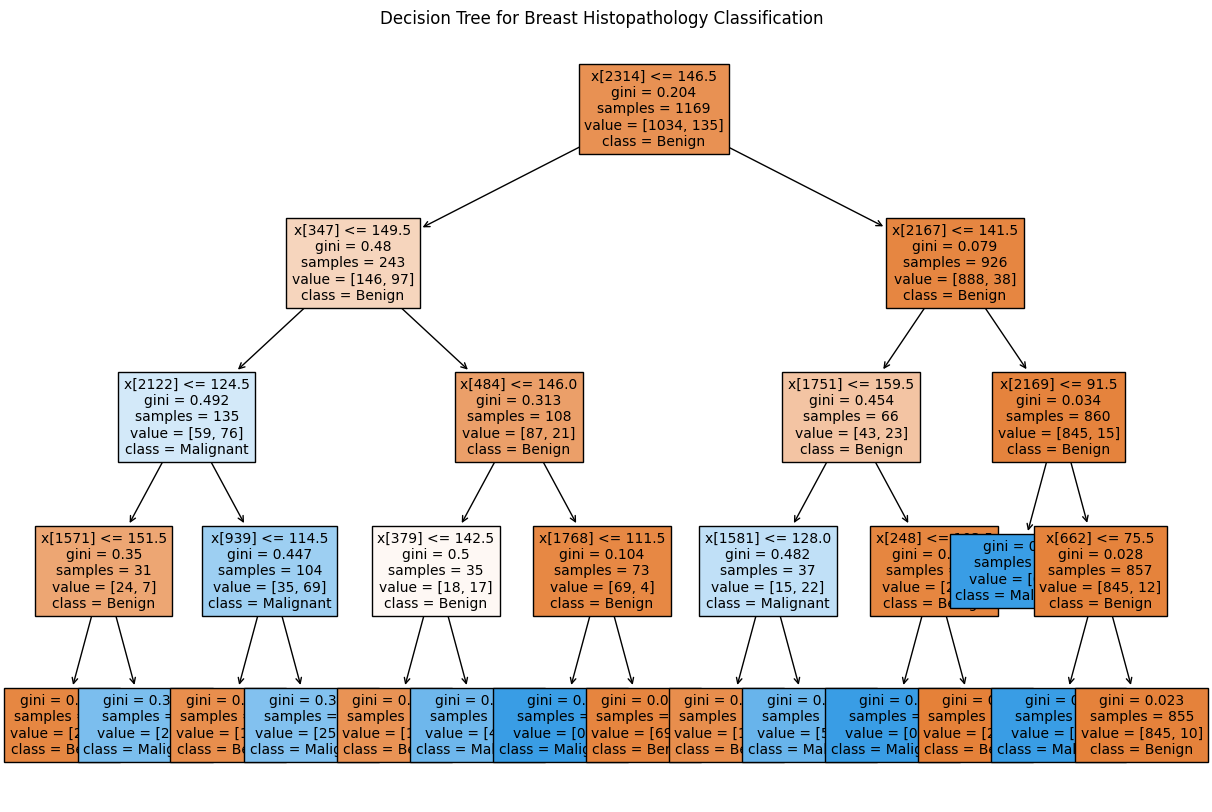

In [27]:
# Install required libraries
!pip install scikit-learn pandas matplotlib opencv-python numpy

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Define dataset path
dataset_path ="C:\\Users\\RIYA\\Downloads\\breastcancer\\IDC_regular_ps50_idx5\\9322"

# Load images and extract features
image_size = (50, 50)  # Resize all images to this size for consistency
features = []
labels = []

for class_label in ["0", "1"]:  # Assuming '0' = Benign, '1' = Malignant
    class_path = os.path.join(dataset_path, class_label)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        img = cv2.resize(img, image_size)  # Resize image
        img_flat = img.flatten()  # Flatten into 1D array
        features.append(img_flat)
        labels.append(int(class_label))  # Convert label to integer

# Convert to NumPy arrays
X = np.array(features)
y = np.array(labels)

# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Make Predictions
y_pred = clf.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, fontsize=10, class_names=["Benign", "Malignant"])
plt.title("Decision Tree for Breast Histopathology Classification")
plt.show()
